#  <span style="text-decoration:underline;">Assignment 3</span>: Predicting Salaries via Classification

## Introduction

In this assignment, you will be working with [US census data](https://raw.githubusercontent.com/lapets/course-data-science/master/assignment-2018-12-03-data.tsv). You can find the schema for the data set [here](https://raw.githubusercontent.com/lapets/course-data-science/master/assignment-2018-12-03-schema.txt). The data is stored in a tab-separated value file in which each line represents an individual person. The data set was extracted from the 1994 US census data. Your goal is to evaluate different models for determining whether a person has an annual salary that is $50,000 or above.  

## Submission

Please use the following invitation link to create your assignment repository for this assignment: [https://classroom.github.com/a/3Af24wlA](https://classroom.github.com/a/3Af24wlA). Include your BU username within your submission by adding it here: **<minzhou@bu.edu&gt;**.

Do not delete the output of your code cells. This assignment must be completed **individually** by each student.

## <span style="text-decoration:underline;">Problem 1</span>: Feature Dimension Representations

**<span style="text-decoration:underline;">Part A</span> (20 points):** This data set contains categorical values in its feature dimensions. Most of the algorithms that were presented during lectures can only handle numeric quantities. Thus, it is necessary to create a new feature dimension for every unique value of each categorical variable. To accomplish this, you can use `pandas.get_dummies`. An example is provided below.

In [1]:
import pandas as pd
raw_data = {'age': [23, 62, 31, 48, 59],
        'salary': [60000, 100000, 120000, 150000, 95000],
        'education': ['Bachelor', 'Masters', 'PhD', 'Jd', 'Masters']}
df = pd.DataFrame(raw_data, columns = ['age', 'salary', 'education'])
df_edu = pd.get_dummies(df['education'], prefix = 'edu')
df_new = pd.concat([df, df_edu], axis=1)
df_new = df_new.drop( ['education'], axis = 1 )
df_new

,age,salary,edu_Bachelor,edu_Jd,edu_Masters,edu_PhD
0,23,60000,1,0,0,0
1,62,100000,0,0,1,0
2,31,120000,0,0,0,1
3,48,150000,0,1,0,0
4,59,95000,0,0,1,0


Convert all categorical feature dimensions within the data set in this way, storing the result as a new data frame.

## Solution:

In [2]:
import numpy as np

In [3]:
schema_dict = {}
with open('assignment-2018-12-03-schema.txt') as fileobj:
    for line in fileobj:
        key, value = line.strip().split(":")
        value = value.split()
        schema_dict[key] = value

In [4]:
header_row = list(schema_dict.keys())

In [5]:
header_row.append('salary')

In [6]:
df = pd.read_csv('assignment-2018-12-03-data.tsv', sep='\t', header=None, names=header_row, index_col=False)

In [7]:
# drop rows with '?'
df = df.replace({'?': np.nan}).dropna()

In [8]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [9]:
df_work= pd.get_dummies(df['workclass'], prefix = 'work')
df_edu = pd.get_dummies(df['education'], prefix = 'edu')
df_marital = pd.get_dummies(df['marital-status'], prefix = 'marital')
df_occupation = pd.get_dummies(df['occupation'], prefix = 'occupation')
df_relationship = pd.get_dummies(df['relationship'], prefix = 'relationship')
df_race = pd.get_dummies(df['race'], prefix = 'race')
df_sex = pd.get_dummies(df['sex'], prefix = 'sex')
df_country = pd.get_dummies(df['native-country'], prefix = 'country')
df_salary = pd.get_dummies(df['salary'], prefix = 'salary').drop(columns=['salary_<=50K'])

In [10]:
df_new = pd.concat([df, df_work, df_edu, df_marital, df_occupation, df_relationship, df_race, df_sex, df_country], axis=1)
df_new = df_new.drop(['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'salary'], axis = 1 )

In [11]:
df_new

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,work_Federal-gov,work_Local-gov,work_Private,work_Self-emp-inc,...,country_Portugal,country_Puerto-Rico,country_Scotland,country_South,country_Taiwan,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Vietnam,country_Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,37,284582,14,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6,49,160187,5,0,0,16,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,52,209642,9,0,0,45,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,31,45781,14,14084,0,50,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
9,42,159449,13,5178,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


## <span style="text-decoration:underline;">Problem 2</span>: Classification Methods

For each part below, you may use either the data in its original form or the transformed representation of the data that you generated in Problem 1.

**<span style="text-decoration:underline;">Part A</span> (20 points):** Use $k$-nearest neighbors to implement an algorithm that predicts the whether an individual has an annual salary of 50,000 dollars or above. Note that the target feature dimension is discrete; you may use a boolean value or $\{0,1\}$. Explain how you chose $k$ and report the accuracy of your model on the data. Using `KNeighborsClassifier` is permitted.

## Solution:
### Prepare the data X and label y
For the label y, y = 1 means the salary is 50,000 dollars or above. 

In [12]:
y = df_salary.values.ravel()
y

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [13]:
X = df_new.values

### Split training and testing data

In [159]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(28853, 104) (14212, 104) (28853,) (14212,)


### KNeighborsClassifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('The accuracy_score is: ')
print(metrics.accuracy_score(y_test, y_pred))

The accuracy_score is: 
0.7525330706445258


### Choose the best K
The best K is the one that corresponds to the highest accuracy_score.

In [16]:
accuracy_scores = []
k_range = range(1, 40)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0,0.5,'Testing Accuracy')

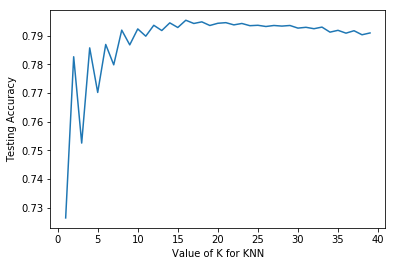

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

From the above graph, the best K is 16 since the peak testing accuracy corresponds to K = 16.

In [18]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('When k = 16, the best accuracy_score is: ')
print(metrics.accuracy_score(y_test, y_pred))

When k = 16, the best accuracy_score is: 
0.7953841823810864


### 10-folder cross validation

In [20]:
from sklearn.model_selection import cross_val_score
print('The mean accuracy of 10-folder cross validation:')
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

The mean accuracy of 10-folder cross validation:
0.7932659617437157


**<span style="text-decoration:underline;">Part B</span> (20 points):** Use [decision trees](http://scikit-learn.org/stable/modules/tree.html) to build a model that predicts the same target feature dimension (income of 50,000 or above). Report your accuracy and compare it to your results from part (a). Using `tree` from `sklearn` is permitted.

## Solution:
### DecisionTreeClassifier

In [21]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('The accuracy_score is: ')
print(metrics.accuracy_score(y_test, y_pred))

The accuracy_score is: 
0.8132564030396848


### 10-folder cross validation

In [22]:
from sklearn.model_selection import cross_val_score
print('The mean accuracy of 10-folder cross validation:')
print(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())

The mean accuracy of 10-folder cross validation:
0.8097056068452073


As we can see, the DecisionTreeClassifier is better than part(a) k-nearest neighbors method.

**<span style="text-decoration:underline;">Part C</span> (20 points):** Build a support vector machine model that solves the same problem. Report your accuracy and compare it to your results from parts (a) and (b). 

## Solution:
### SVM

Due to time limitation, here is using 20000 examples for training.

In [25]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train[:20000], y_train[:20000])
y_pred = clf.predict(X_test)
print('The accuracy_score is: ')
print(metrics.accuracy_score(y_test, y_pred))

The accuracy_score is: 
0.7501407261469181


### 10-folder cross validation

In [27]:
from sklearn.model_selection import cross_val_score
print('The mean accuracy of 10-folder cross validation:')
print(cross_val_score(clf, X[:20000], y[:20000], cv=10, scoring='accuracy').mean())

0.7460099252481311


The svm model is worse than part(a) and part(b).

**<span style="text-decoration:underline;">Part D</span> (20 points):** Build a logistic regression model that solves the same problem. Report your accuracy and compare it to your results from parts (a), (b), and (c). 

## Solution:
### LogisticRegression

In [23]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('The accuracy_score is: ')
print(metrics.accuracy_score(y_test, y_pred))

The accuracy_score is: 
0.7936251055446102


### 10-folder cross validation

In [24]:
from sklearn.model_selection import cross_val_score
print('The mean accuracy of 10-folder cross validation:')
print(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())

The mean accuracy of 10-folder cross validation:
0.7912226198257445


From the test accuracy score, the LogisticRegression result is worse than part(a) and part(b), but it is better than part(c).

## Extra credits for Neural Network

Part E (30 points): Build a neural network model that solves the same problem (i.e., whether an individual earns $50,000 per year or less). Determine the accuracy of your model and compute a confidence interval for this accuracy measure. If you need to take samples of the data set to accomplish this, you may do so.



In [169]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

### Constuct the model

In [172]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=104))
# add dropout layer to avoid overfitting
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [173]:
model.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
28853/28853 [==============================] - 2s 78us/step - loss: 8.7484 - acc: 0.4523: 2s - loss: 
Epoch 2/30
28853/28853 [==============================] - 1s 50us/step - loss: 7.7186 - acc: 0.5170
Epoch 3/30
28853/28853 [==============================] - 1s 50us/step - loss: 6.1206 - acc: 0.6179
Epoch 4/30
28853/28853 [==============================] - 1s 50us/step - loss: 5.2537 - acc: 0.6727
Epoch 5/30
28853/28853 [==============================] - 2s 52us/step - loss: 4.6541 - acc: 0.7104
Epoch 6/30
28853/28853 [==============================] - 2s 52us/step - loss: 4.4710 - acc: 0.7220
Epoch 7/30
28853/28853 [==============================] - 2s 52us/step - loss: 4.3837 - acc: 0.7276: 0s - loss: 4.4230 - acc
Epoch 8/30
28853/28853 [==============================] - 2s 52us/step - loss: 4.2739 - acc: 0.7345
Epoch 9/30
28853/28853 [==============================] - 1s 51us/step - loss: 4.2136 - acc: 0.7383
Epoch 10/30
28853/28853 [==============================] - 2s 

In [174]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

14212/14212 [==============================] - 1s 44us/step
Test accuracy: 0.752744159864903


The test accuracy of this Neural Network is 0.752744159864903

### Compute the 95% confidence interval

In [198]:
from math import sqrt
z=1.96 # 95% confidence interval
accuracy = test_acc
interval = z * sqrt( (accuracy * (1 - accuracy)) / X_test.shape[0])
print(f'The 95% confidence ineverval is {interval}')

The 95% confidence ineverval is 0.007092926319804925
